# Gaussian Process Regression
#### Description
We assume that our data was generated by a Gaussian Process -- that is, a collection of random variables that has a multivariate normal distribution. The distribution of a Gaussian process is a distribution over functions that model our data.

We use Gaussian Process Regression to find the distribution over functions that best model our data. The mean function is given by the blue line, and the orange fill shows the error bars that estimate our confidence in that prediction.

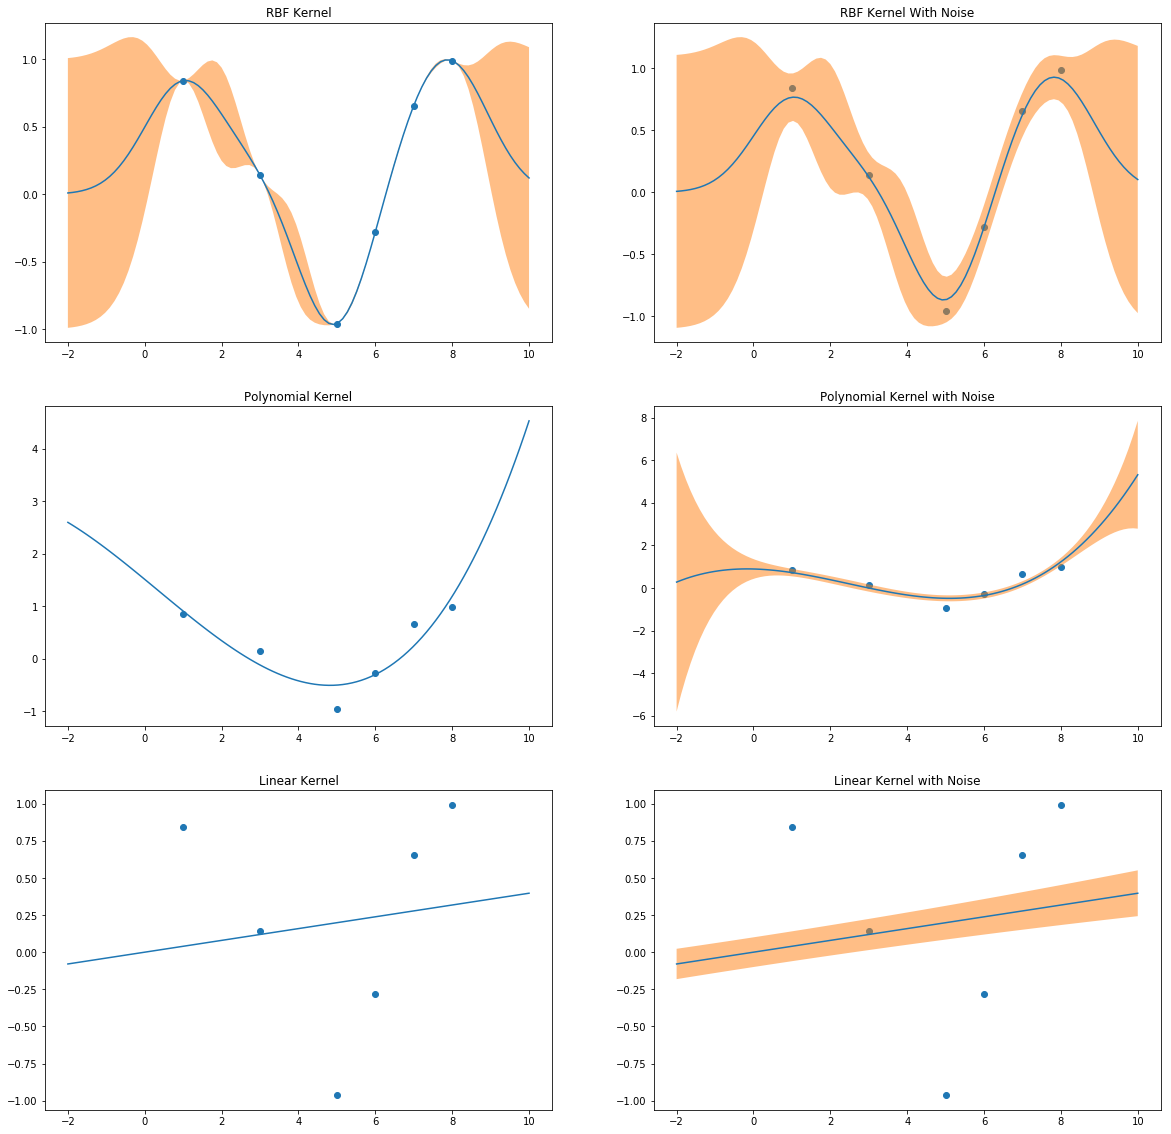

In [0]:
import numpy as np
import matplotlib.pyplot as plt
'''
INPUTS: 
Sample points: X_vals and Y_vals
Test points: X_points at which you will estimate the value of Y
ELASTIC INPUT PARAMETERS:
Mean function: Usually the zero vector. If the assumed base state is not zero, 
the graph is often shifted so that it is zero (to make the math simpler)
Kernel function: We can choose a simple linear regression, a polynomial regression, or
a radial basis function that weighs data more heavily if it is in closer proximity to the test point.
Margin of error: How wide you want your error bars
OUTPUTS:
A graph of the the values of Y_test at X_test points, with error bars.
'''

data_xvals = np.atleast_2d( [ 1.0, 3.0, 5.0, 6.0, 7.0, 8.0 ] )        #Define X and Y
X = np.reshape(data_xvals.T, (6))
Y = np.sin(X)

mean_function = lambda x: 0
covariance_function1 = lambda x1, x2: np.exp(-.5*(x1 - x2)**2)      #isotropic rbf kernel
DEGREE_OF_POLYNOMIAL = 3
n = DEGREE_OF_POLYNOMIAL
covariance_function2 = lambda x1, x2: (1 + x1 * x2)**n                #polynomial kernel
covariance_function3 = lambda x1, x2: (x1 * x2)                     #linear kernel
mu = mean_function
k = covariance_function1

NUM_X_STEPS = 100
X_test = np.linspace(-2, 10, NUM_X_STEPS)                             #Define X_test


def calcMuSigma(k, NOISE=False):
    mu_prime = np.zeros((len(X_test)))                       #mu_prime is the mean of Y_test!
    sigma_prime = np.zeros((len(X_test)))                    #sigma_prime is the std. dev. of Y_test
    sigma_squared = .1
    
    for i in range(len(X_test)):
        kXX = np.zeros((len(X), len(X)))
        kXXtest = np.zeros((len(X), 1))
        kXtestX = np.zeros((1, len(X)))
        kXtestXtest = np.zeros((1, 1))
    
        for row in range (len(X)):
            for col in range (len(X)):
                kXX[row][col] = k(X[row],X[col])             #covariance k(X, X) 1
                if ((row == col) and (NOISE == True)):
                    kXX[row][col] += sigma_squared
        for row in range(len(X)):
            kXXtest[row][0]= k(X_test[i], X[row])             #covariance k(X, X_test) 2
        for col in range(len(X)):
            kXtestX[0][col] = k(X[col], X_test[i])          #covariance k(X_test, X) 3
        kXtestXtest[0][0] = k(X_test[i], X_test[i])         #covariance k(X_test, X_test) 4
        if ((NOISE == True)):
            kXtestXtest[0][0] += sigma_squared
            
        mu_prime[i] = mu(X_test[i]) + np.dot(np.dot(kXtestX, np.linalg.pinv(kXX)),(Y - mu(X)))
        sigma_prime[i] = kXtestXtest - np.dot(np.dot(kXtestX, np.linalg.pinv(kXX)),kXXtest)
        
    return mu_prime, sigma_prime

NOISE = True
mu_prime_rbf, sigma_prime_rbf = calcMuSigma(covariance_function1)
mu_prime_rbf_noise, sigma_prime_rbf_noise = calcMuSigma(covariance_function1, NOISE)
mu_prime_linear, sigma_prime_linear = calcMuSigma(covariance_function3)
mu_prime_linear_noise, sigma_prime_linear_noise = calcMuSigma(covariance_function3, NOISE)
mu_prime_poly, sigma_prime_poly = calcMuSigma(covariance_function2)
mu_prime_poly_noise, sigma_prime_poly_noise = calcMuSigma(covariance_function2, NOISE)


axarr = np.empty((2, 3))

f, axarr = plt.subplots(3, 2, figsize=(20, 20))
axarr[0, 0].plot(X_test, mu_prime_rbf)
axarr[0, 0].set_title('RBF Kernel')
axarr[0, 0].scatter(X, Y)
axarr[0, 0].fill_between(X_test, mu_prime_rbf + sigma_prime_rbf, mu_prime_rbf - sigma_prime_rbf, alpha = .5)

axarr[0, 1].plot(X_test, mu_prime_rbf_noise)
axarr[0, 1].set_title('RBF Kernel With Noise')
axarr[0, 1].scatter(X, Y)
axarr[0, 1].fill_between(X_test, mu_prime_rbf_noise + sigma_prime_rbf_noise, mu_prime_rbf_noise - sigma_prime_rbf_noise, alpha = .5)

axarr[1, 0].plot(X_test, mu_prime_poly)
axarr[1, 0].set_title('Polynomial Kernel')
axarr[1, 0].scatter(X, Y)
axarr[1, 0].fill_between(X_test, mu_prime_poly + sigma_prime_poly, mu_prime_poly - sigma_prime_poly, alpha = .5)

axarr[1, 1].plot(X_test, mu_prime_poly_noise)
axarr[1, 1].set_title('Polynomial Kernel with Noise')
axarr[1, 1].scatter(X, Y)
axarr[1, 1].fill_between(X_test, mu_prime_poly_noise + sigma_prime_poly_noise, mu_prime_poly_noise - sigma_prime_poly_noise, alpha = .5)

axarr[2, 0].plot(X_test, mu_prime_linear)
axarr[2, 0].set_title('Linear Kernel')
axarr[2, 0].scatter(X, Y)
axarr[2, 0].fill_between(X_test, mu_prime_linear + sigma_prime_linear, mu_prime_linear - sigma_prime_linear, alpha = .5)

axarr[2, 1].plot(X_test, mu_prime_linear_noise)
axarr[2, 1].set_title('Linear Kernel with Noise')
axarr[2, 1].scatter(X, Y)
axarr[2, 1].fill_between(X_test, mu_prime_linear_noise + sigma_prime_linear_noise, mu_prime_linear_noise - sigma_prime_linear_noise, alpha = .5)

plt.show()

#When the polynomial kernel is of a high degree, as soon as it leaves the range of the test points, the regression overfits and blows up as x->infinity.
#When the polynomial kernel is of a low degree, it under-fits, and ultimately becomes linear.
#When the bandwidth parameter gets small, the bandwidth shrinks so that the only possible value is at the point.
#When the bandwidth parameter gets large, the bandwidth expands and stabilizes around zero, which makes sense given our mean vector mu was given to be zero.